<a href="https://colab.research.google.com/github/SwagataJ/machine-learning-concepts/blob/main/deep-learning/two_layer_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment : Week 1
## Submission by: Swagata Jana

#### Problem : Build a two-layer neural network from scratch In python.
#### Description : To gain a better understanding of Deep Learning, build a Neural Network from scratch using only python, without a deep learning library like TensorFlow. Understanding the inner workings of a Neural Network is important to a ML Engineer. (You can use scientific libraries like numpy, scipy etc)
#### Dataset: MNIST

## Importing the packages

1.   Numpy: Numpy is used for scientific computations like dot product, exponents, etc
2.   Matplotlib: Matplotlib is used for plotting the loss values against the epochs



In [10]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

I am using **Keras** to import the dataset.
Then, the data is split into training data and testing data respectively.

PS: I tried downloading the dataset manually from [Yann Lecun](http://yann.lecun.com/exdb/mnist/) but I was not authorized, hence I was compelled to use a library.

In [11]:
# Taking the MNIST dataset from Keras datasets
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Preprocessing the data


1. Flattening the image into a one dimensional vector of length 784.

2. Normalizing the pixel values

3. Converting output labels to numerical vectors( **one hot encoding** )

In [12]:
# Flatten images into a vector of 784 features
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Normalize pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

## Defining the hyperparameters

Hyperparameters such as learning rate, epochs, number of nodes in each layers.

In [13]:
# Defining hyperparameters
inputLayer = 784
outputLayer = 10
hiddenLayer = 100
learning_rate = 2
n_epochs = 101

## Defining the activation functions

In [14]:
# Sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))    

# Derivative of Sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x)*(1 - sigmoid(x))

# Softmax Funtion
def softmax(x):
    exps = np.exp(x)
    return exps / np.sum(exps, axis=1, keepdims=True)

## Defining the Loss Function (**cross entropy loss**)

In [15]:
# Loss function
def crossEntropyLoss(y_pred, y_true):
    loss = -np.sum(y_true * np.log(y_pred)) / x_train.shape[0]
    return loss


## Forward and Backward Propagation



1. Forward propagation involves passing input through the network, computing activations by multiplying with weights, adding biases and applying activation functions. The output of one layer is the input to the next.

2. Backward propagation is the process of computing gradients of the loss function with respect to the weights and biases of the neural network, using the chain rule of calculus. These gradients are used to update the weights and biases during training.







In [16]:
# Forward and Backward Propagation
def fowardAndBackwardPropagation(params, X, y, lr):
    W1, b1, W2, b2 = params

    Z1 = np.dot(X,W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2;
    A2 = softmax(Z2)
  
    dz2 = (A2 - y)
    dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(Z1)

    dw2 = np.dot(A1.T, dz2) / X.shape[0]
    db2 = np.sum(dz2, axis=0) / X.shape[0]
    dw1 = np.dot(X.T, dz1) / X.shape[0]
    db1 = np.sum(dz1, axis=0) / X.shape[0]

    loss = crossEntropyLoss(A2, y)

    return dw1, db1, dw2, db2, loss

## Initialization of weights and biases

1.   The weights have been initialized to abritrary random numbers and then multiplying by 0.01 so that the weights are small and close to zero.

2.   The biases are all set to zero so that the network is neutral at the start.



In [17]:
# Initialising the weights and biases
W1 = np.random.randn(inputLayer, hiddenLayer) * 0.01
b1 = np.zeros(hiddenLayer)
W2 = np.random.randn(hiddenLayer, outputLayer) * 0.01
b2 = np.zeros(outputLayer)

## Training the model

Now the model is trained on the training data where its weights and baises are adjusted to minimise the loss and give a correct prediction for the output.

In [18]:
# Training the model
losses = list()

for epoch in range(n_epochs):
    params = (W1, b1, W2, b2)
    dw1, db1, dw2, db2, loss = fowardAndBackwardPropagation(params, x_train, y_train, learning_rate)
    W2 -= learning_rate * dw2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dw1
    b1 -= learning_rate * db1

    losses.append(loss)
    if epoch % 5 == 0:
        print(f'Epoch {epoch}/{n_epochs} - loss: {loss:.4f}')


Epoch 0/101 - loss: 2.3034
Epoch 5/101 - loss: 2.4095
Epoch 10/101 - loss: 2.2423
Epoch 15/101 - loss: 2.1220
Epoch 20/101 - loss: 1.7977
Epoch 25/101 - loss: 1.3760
Epoch 30/101 - loss: 1.0687
Epoch 35/101 - loss: 0.8751
Epoch 40/101 - loss: 0.7872
Epoch 45/101 - loss: 1.0465
Epoch 50/101 - loss: 0.6177
Epoch 55/101 - loss: 0.5794
Epoch 60/101 - loss: 0.5854
Epoch 65/101 - loss: 0.5310
Epoch 70/101 - loss: 0.4709
Epoch 75/101 - loss: 0.4575
Epoch 80/101 - loss: 0.4456
Epoch 85/101 - loss: 0.4190
Epoch 90/101 - loss: 0.3924
Epoch 95/101 - loss: 0.3738
Epoch 100/101 - loss: 0.3614


## The loss-epoch graph

Here is the losses for each epoch is plotted in a graph using matplotlib.

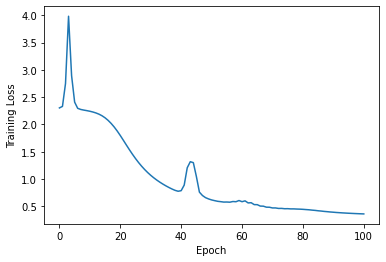

In [19]:
# Plotting the loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()


## Testing the model

Now the model is tested as to how the model performs on unseen data and its accuracy is printed.

In [20]:
# Evaluate on test set
Z1 = np.dot(x_test, W1) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2) + b2
A2 = softmax(Z2)
accuracy = np.mean(np.argmax(A2, axis=1) == np.argmax(y_test, axis=1))
print(f"Test accuracy: {accuracy*100}%")


Test accuracy: 90.16999999999999%


## Conclusion

The model achieves an accuracy of ***90.16%***. The accuracy can be further increased by:

*  increasing the number number of hidden layers 

*  using an adaptive learning rate or tweaking the learning rate further

*  increasing the number of neurons per layer

*  using regularization / dropout, etc.


## Brief summary of implementation


1.   Load the MNIST dataset from Keras
2.   Reshape the training data so that each sample is a flat vector of length 784.
3.   Normalize the pixel values to be between 0 and 1
4.   Convert the labels to one-hot encoding using the eye() function from NumPy.
5.   Setting the hyperparameters, such as learning rate, number of nodes in a layer, the activation functions namely, sigmoid and its derivative and softmax.
6.   Defining the loss function which will compute the loss for a particular prediction. I am using cross entropy loss.
7. Computing the forward propagation and the backward propagation which uses the hyperparameters and the loss function.
8. Initialising the weights and biases to arbitrary random values for weights and zeros for biases.
9. Training the model, which uses the forward and backward propagation fucntion.
10. Plotting the losses to check if our model is able to minimise the losses.
11. Checking the accuracy

## Problems faced on implementation


*   I was not very familiar with numpy and had to look up individual functions that would be suitable for a particular operation
*   I was not able to download the MNIST dataset from  [Yann Lecun](http://yann.lecun.com/exdb/mnist/) and then decided to move forward with importing the dataset from a library
* Converting the mathematical formulae to code was a bit complex and I tried to simplify a lot of it on paper
* In the losses graph the loss initially increases drastically, which alarmed me at first and made me think that I had made a huge error but realised that since the weights are generated randomly, it might not be suited to the problem at all.


